In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import IPython.display as ipd

from envelope_draft import Envelope

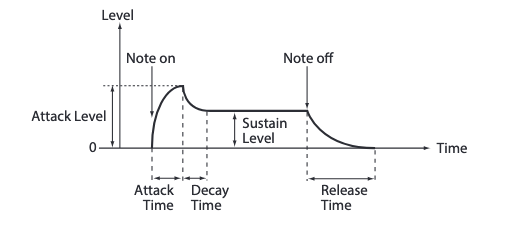


* **attack** 
    * the time taken for initial run-up of level from nil to peak, beginning when the key is pressed.
* **decay** 
    * the time taken for the subsequent run down from the attack level to the designated sustain level.
* **sustain** 
    * the level during the main sequence of the sound's duration, until the key is released.
* **release** 
    * the time taken for the level to decay from the sustain level to zero after the key is released
    
    
--- 
https://python.plainenglish.io/build-your-own-python-synthesizer-part-2-66396f6dad81

notes:
* call parameter for input something like input_signal (not sine or tone)
* precalculate the **full** range of A, D, S, and R for all instances of the Envelope; that way each note can access that same information without having to redo it each time
    * ok, so I think I should have the Envelope class create the basics with Synthesis doing the work to ensure it aligns with each specific note 

In [2]:
frequency = 220
amplitude = 0.5
duration = 1.
sample_rate = 22050
each_sample = np.arange(int(duration*sample_rate))
sine = np.sin(2 * np.pi * each_sample * frequency / sample_rate) * amplitude

E = Envelope(
    sine,
    sample_rate,
    attack_setting=20,
    decay_setting=5,
    sustain_setting=20,
    release_setting=20
)

From here, I am aiming to create a method: `generate_envelope_signal()`.

This should accept an input signal and will use the Envelope class that's already instantiated, e.g.

```
sine = np.sin(...)
E = Envelope(...)
envelope_for_signal = E.generate_envelope_signal(sine)
sine *= envelope_for_signal
```

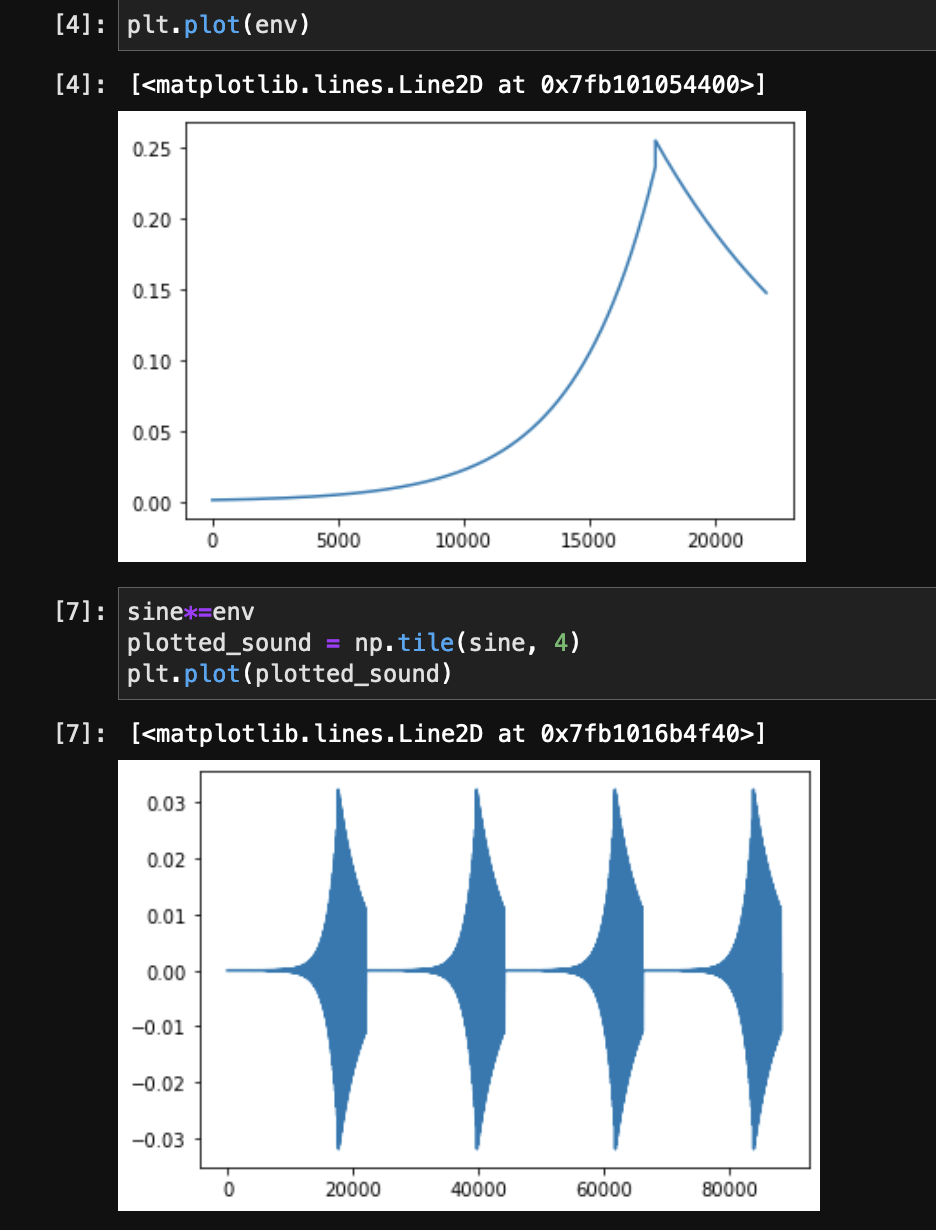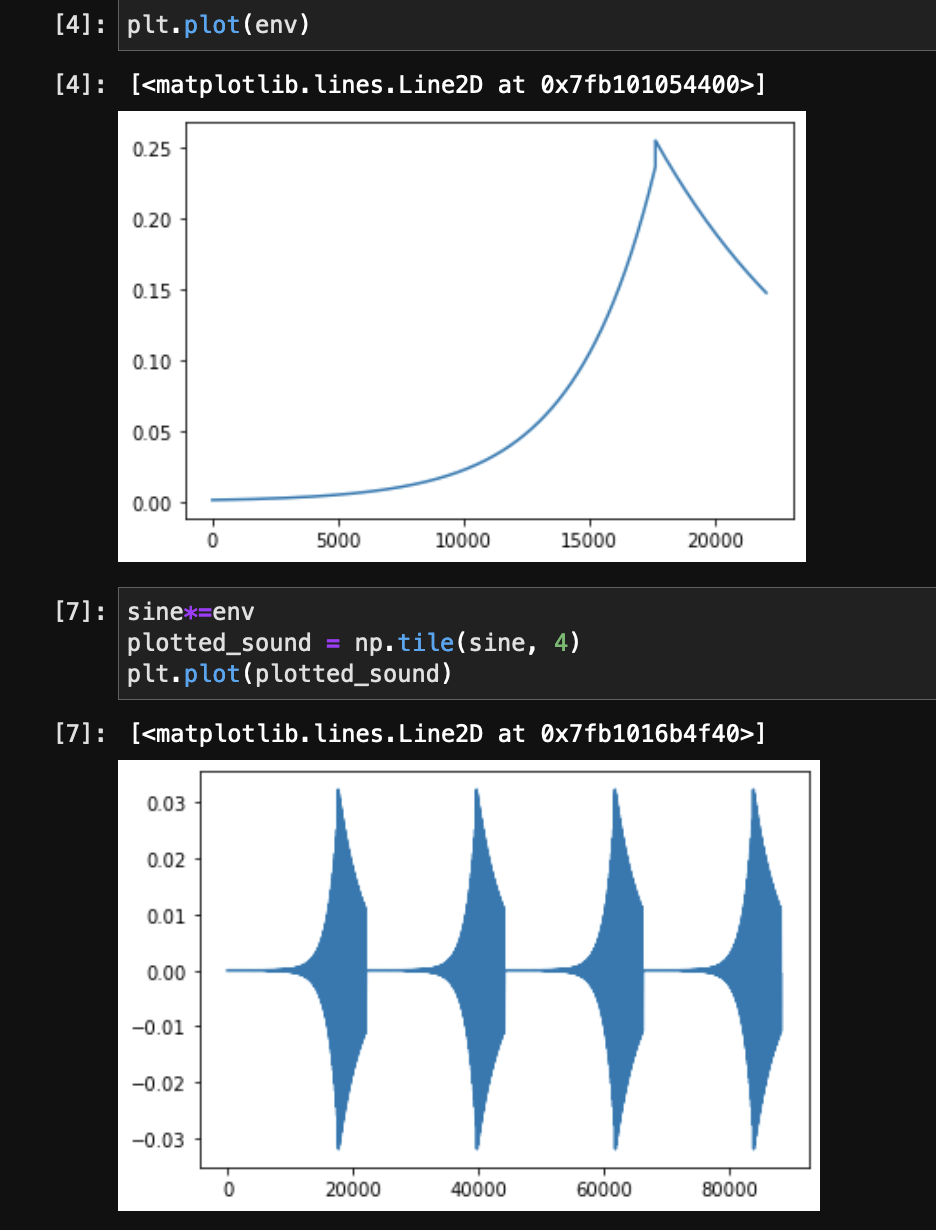

The above is what I was initially thinking would be the solution: the release would simply pick up where the attack leaves off, but this - again - leads to amplitude spikes, causing pops / clicks. I should simply adjust the release to drop to 0 by the end of the sound. Do not worry about letting the sound bleed into the next note -- this might be something for the future, but do not let it distract. It's ok if something about this synthesizer is not "realistic". 

In other words, the user-defined release point should supercede the actual release. 

In [3]:
env = E.generate_envelope_signal(sine)

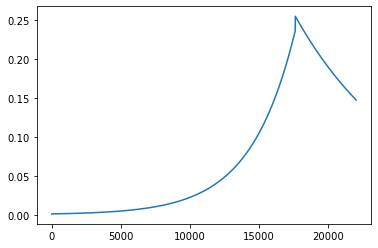

In [4]:
plt.plot(env)

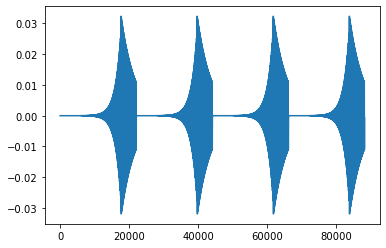

In [7]:
sine*=env
plotted_sound = np.tile(sine, 4)
plt.plot(plotted_sound)

In [6]:
ipd.Audio(plotted_sound, rate=sample_rate)